In [ ]:
!pip install DeepXDE==0.10
#!pip install DeepXDE==1.1.3

gpu_info = !nvidia-smi
gpu_info = '\n'.join(gpu_info)
if gpu_info.find('failed') >= 0:
  print('Select the Runtime > "Change runtime type" menu to enable a GPU accelerator, ')
  print('and then re-execute this cell.')
else:
  print(gpu_info)

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 73 kB 1.7 MB/s 
     |████████████████████████████████| 756 kB 11.1 MB/s 
     |████████████████████████████████| 76 kB 6.5 MB/s 
     |████████████████████████████████| 52 kB 1.5 MB/s 
Thu Jun  2 21:50:04 2022       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 460.32.03    Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla P100-PCIE...  Off  | 00000000:00:04.0 Off |                    0 |
| N

Using TensorFlow 2 backend.

Instructions for updating:
non-resource variables are not supported in the long term
Estimatig tausi
v_init
[[0.0786669 ]
 [0.08099519]]
observe_init
[[6. 0.]
 [0. 0.]]
flag 1
Compiling model...
Building feed-forward neural network...
'build' took 0.091563 s



/usr/local/lib/python3.7/dist-packages/deepxde/maps/fnn.py:82: UserWarning: `tf.layers.dense` is deprecated and will be removed in a future version. Please use `tf.keras.layers.Dense` instead.
  kernel_regularizer=self.regularizer,
/usr/local/lib/python3.7/dist-packages/keras/legacy_tf_layers/core.py:261: UserWarning: `layer.apply` is deprecated and will be removed in a future version. Please use `layer.__call__` method instead.
  return layer.apply(inputs)


'compile' took 5.622927 s

flag 2
Initializing variables...
Training model...

Step      Train loss                                                      Test loss                                                       Test metric
0         [1.47e-03, 1.20e-03, 1.59e-03, 4.10e-03, 6.34e-01, 1.39e+00]    [1.56e-03, 1.35e-03, 1.87e-03, 0.00e+00, 0.00e+00, 0.00e+00]    []  
1         [1.46e-03, 1.19e-03, 1.59e-03, 4.08e-03, 6.25e-01, 1.36e+00]    [1.54e-03, 1.34e-03, 1.87e-03, 0.00e+00, 0.00e+00, 0.00e+00]    []  

Best model at step 1:
  train loss: 1.99e+00
  test loss: 4.75e-03
  test metric: []

'train' took 5.962283 s

flag 3
out_path: /content
[<tf.Tensor 'Exp:0' shape=() dtype=float32>]
flag 3.1
flag 3.2
flag 3.3
Training model...

Step      Train loss                                                      Test loss                                                       Test metric
1         [1.46e-03, 1.19e-03, 1.59e-03, 4.08e-03, 6.25e-01, 1.36e+00]    [1.54e-03, 1.34e-03, 1.87e-03, 0

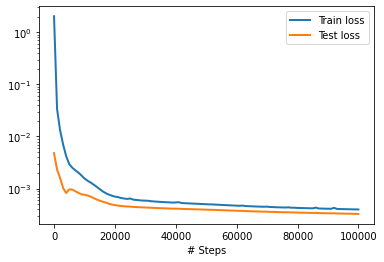

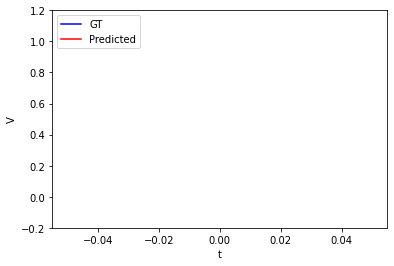

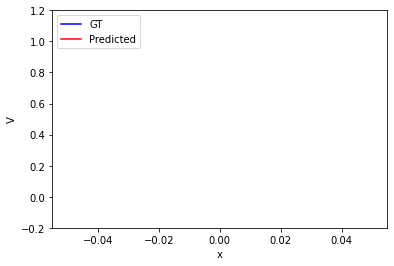

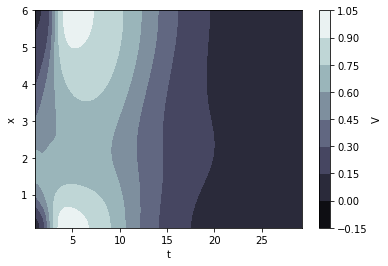

In [ ]:
import sys
import os
#dir_path = os.path.dirname(os.path.realpath(__file__))
#sys.path.append(dir_path)
dir_path = '/content'
sys.path.append(dir_path)
from sklearn.model_selection import train_test_split
from deepxde.backend import tf
import matplotlib.pyplot as plt
import argparse
import numpy as np
import deepxde as dde # version 0.11 or higher
from generate_plots_1d import plot_1D  # should be changed for the new one
from generate_plots_2d import plot_2D
#from generate_plots_1d_MV import plot_1D
import utils

#if __name__ == "__main__":
    #parser = argparse.ArgumentParser()
    #parser.add_argument('-f', '--file-name', dest='file_name', required = True, type = str, help='File name for input data')
    #parser.add_argument('-m', '--model-folder-name', dest='model_folder_name', required = False, type = str, help='Folder name to save model (prefix /)')
    #parser.add_argument('-d', '--dimension', dest='dim', required = True, type = int, help='Model dimension. Needs to match the input data')
    #parser.add_argument('-n', '--noise', dest='noise', action='store_true', help='Add noise to the data')
    #parser.add_argument('-w', '--w-input', dest='w_input', action='store_true', help='Add W to the model input data')
    #parser.add_argument('-v', '--inverse', dest='inverse', required = False, type = str, help='Solve the inverse problem, specify variables to predict (e.g. a / ad / abd')
    #parser.add_argument('-ht', '--heter', dest='heter', required = False, action='store_true', help='Predict heterogeneity - only in 2D')
    #parser.add_argument('-p', '--plot', dest='plot', required = False, action='store_true', help='Create and save plots')
    #parser.add_argument('-a', '--animation', dest='animation', required = False, action='store_true', help='Create and save 2D Animation')
    #args = parser.parse_args()


## Network Parameters
# 1D
input_1d = 2 # network input size (1D) # dimension of the X
num_hidden_layers_1d = 4 # number of hidden layers for NN (1D)
hidden_layer_size_1d = 32 # size of each hidden layers (1D)
output_1d = 3 # network output size (1D)
# 2D
input_2d = 3 # network input size (2D)
num_hidden_layers_2d = 4 # number of hidden layers for NN (2D)
hidden_layer_size_2d = 32 # size of each hidden layers (2D)
output_2d = 3 # network output size (2D)
output_heter = 3 # network output size for heterogeneity case (2D)
## Training Parameters
num_domain = 20000 # number of training points within the domain
num_boundary = 1000 # number of training boundary condition points on the geometry boundary
num_test = 1000 # number of testing points within the domain
MAX_MODEL_INIT = 16 # maximum number of times allowed to initialize the model
MAX_LOSS = 4 # upper limit to the initialized loss
epochs = 100000 #60000 # number of epochs for training
lr =  0.00005 # learning rate
noise = 0.1 # noise factor
test_size = 0.1 # precentage of testing data 

def main():

    dim = 1
    noise_introduced = False
    inverse_activated = True
    inverse_string = 'tausi'
    inverse = ['tausi']  #[inverse_string]
    model_folder_name = "/content"
    animation = False
    heter = False
    w_used = False #data

    ## Get Dynamics Class
    dynamics = utils.system_dynamics()

    ## Parameters to inverse (if needed)
    params = dynamics.params_to_inverse(inverse)

    ## Generate Data
    file_name = "data_nifedipine_exp"
    observe_x, u, w = dynamics.generate_data(file_name, dim)

    ## Split data to train and test
    observe_train, observe_test, u_train, u_test = train_test_split(observe_x, u, test_size=test_size)
    ## Split with W
    if w_used:
      observe_train, observe_test, u_train, u_test, w_train, w_test = train_test_split(observe_x, u, w, test_size=test_size)

    ## Add noise to training data if needed
    if noise_introduced:
        u_train = u_train + noise*np.random.randn(u_train.shape[0], u_train.shape[1])

    ## Geometry and Time domains
    geomtime = dynamics.geometry_time(dim)
    ## Define Boundary Conditions
    bc = dynamics.BC_func(dim, geomtime)
    ## Define Initial Conditions
    ic = dynamics.IC_func(observe_train, u_train)

    ## Model observed data
    observe_u = dde.PointSetBC(observe_train, u_train, component=0)  # component says which component it is
    input_data = [bc, ic, observe_u]
    if w_used: ## If W required as an input
        observe_w = dde.PointSetBC(observe_train, w_train, component=1)  # probably will have to change component to =2s
        input_data = [bc, ic, observe_u, observe_w]

    ## Select relevant PDE (Dim, Heterogeneity) and define the Network
    if dim == 1:
        pde = dynamics.pde_1D
        net = dde.maps.FNN([input_1d] + [hidden_layer_size_1d] * num_hidden_layers_1d + [output_1d], "tanh", "Glorot uniform")
    elif dim == 2 and heter:
        pde = dynamics.pde_2D_heter
        net = dde.maps.FNN([input_2d] + [hidden_layer_size_2d] * num_hidden_layers_2d + [output_heter], "tanh", "Glorot uniform")
        net.apply_output_transform(dynamics.modify_output_heter)
    elif dim == 2 and not heter:
        pde = dynamics.pde_2D
        net = dde.maps.FNN([input_2d] + [hidden_layer_size_2d] * num_hidden_layers_2d + [output_2d], "tanh", "Glorot uniform")
    pde_data = dde.data.TimePDE(geomtime, pde, input_data,
                            num_domain = num_domain,
                            num_boundary=num_boundary,
                            anchors=observe_train,
                            num_test=num_test)
    model = dde.Model(pde_data, net)
    #loss_weights = [1]*(len(input_data)+2)  # original
    #loss_weights = [1]*(len(input_data)+3)   # mine (new)
    #loss_weights[0:2] = (1.5,1.5)
    #model.compile("adam", lr=lr, loss_weights=loss_weights)
    print("flag 1")
    model.compile("adam", lr=lr)
    print("flag 2")

    ## Stabalize initialization process by capping the losses
    losshistory, _ = model.train(epochs=1)
    num_itertions = len(losshistory.loss_train)
    initial_loss = max(losshistory.loss_train[num_itertions - 1])
    num_init = 0
    while initial_loss>MAX_LOSS or np.isnan(initial_loss).any() or np.isinf(initial_loss).any():  # added checking for inf values
        num_init += 1
        model = dde.Model(pde_data, net)
        model.compile("adam", lr=lr)
        #model.compile("adam", lr=lr, loss_weights=loss_weights)
        losshistory, _ = model.train(epochs=1)
        initial_loss = max(losshistory.loss_train[0])
        if num_init > MAX_MODEL_INIT:
            raise ValueError('Model initialization phase exceeded the allowed limit')

    print("flag 3")


    #D = tf.math.exp(tf.Variable(-1.897119985))  #initialised to 0.15
    #D = tf.math.exp(dde.Variable(-0.6931471806))  #initialised to 0.5
    #D = dde.Variable(0.5)
    ## Train Network
    out_path = dir_path
    print("out_path: " + out_path)
    print(params)
    if inverse_activated:
        #model.compile("adam", lr=lr, metrics=["l2 relative error"], external_trainable_variables=params[0]) #added
        print("flag 3.1")
        variables_file = "variables_" + inverse_string + ".dat"
        print("flag 3.2")
        variable = dde.callbacks.VariableValue(params, period=1000, filename=variables_file)
        print("flag 3.3")
        losshistory, train_state = model.train(epochs=epochs, model_save_path = out_path, callbacks=[variable])
        print("flag 3.4")
    else:
        print("flag 3.5")
        losshistory, train_state = model.train(epochs=epochs, model_save_path = out_path, display_every=1000)  # crashes here
        print("flag 3.6")

    # Plot loss history
    loss_train = np.sum(losshistory.loss_train, axis=1)
    loss_test = np.sum(losshistory.loss_test, axis=1)

    plt.figure()
    plt.semilogy(losshistory.steps, loss_train, label="Train loss", linewidth=2)
    plt.semilogy(losshistory.steps, loss_test, label="Test loss", linewidth=2)
    for i in range(len(losshistory.metrics_test[0])):
        plt.semilogy(
            losshistory.steps,
            np.array(losshistory.metrics_test)[:, i],
            label="Test metric",
        )
    plt.xlabel("# Steps")
    plt.legend()

    print("flag 4")

    ## Compute rMSE
    u_pred = model.predict(observe_test)[:,0:1]  # add predict V and W and then plot them (in forward mode)
    rmse_u = np.sqrt(np.square(u_pred - u_test).mean())
    print('--------------------------')
    print("V rMSE for test data:", rmse_u)
    print('--------------------------')
    print("Arguments: ")
    #print("Arguments: ", args)

    print("flag 5")

    # Plot
    data_list = [observe_x, observe_train, u_train, u]
    if True and dim == 1:
        plot_1D(data_list,dynamics, model, model_folder_name)
    elif True and dim == 2:
        plot_2D(data_list,dynamics, model, animation, model_folder_name)
    return data_list,dynamics, model, model_folder_name

## Run main code
data_list_exp,dynamics_exp, model_exp, model_folder_name_exp = main()

Estimatig tausi
v_init
[[0.00206193]
 [0.00305608]]
observe_init
[[0. 0.]
 [6. 0.]]
flag 1
Compiling model...
Building feed-forward neural network...
'build' took 0.089922 s



/usr/local/lib/python3.7/dist-packages/deepxde/maps/fnn.py:82: UserWarning: `tf.layers.dense` is deprecated and will be removed in a future version. Please use `tf.keras.layers.Dense` instead.
  kernel_regularizer=self.regularizer,
/usr/local/lib/python3.7/dist-packages/keras/legacy_tf_layers/core.py:261: UserWarning: `layer.apply` is deprecated and will be removed in a future version. Please use `layer.__call__` method instead.
  return layer.apply(inputs)


'compile' took 1.613168 s

flag 2
Initializing variables...
Training model...

Step      Train loss                                                      Test loss                                                       Test metric
0         [4.77e-03, 1.81e-03, 2.60e-03, 6.02e-03, 8.73e-02, 1.89e+00]    [5.31e-03, 1.97e-03, 2.83e-03, 0.00e+00, 0.00e+00, 0.00e+00]    []  
1         [4.66e-03, 1.82e-03, 2.61e-03, 5.97e-03, 8.55e-02, 1.85e+00]    [5.19e-03, 1.98e-03, 2.83e-03, 0.00e+00, 0.00e+00, 0.00e+00]    []  

Best model at step 1:
  train loss: 1.95e+00
  test loss: 1.00e-02
  test metric: []

'train' took 0.763171 s

flag 3
out_path: /content
[<tf.Tensor 'Exp_1:0' shape=() dtype=float32>]
flag 3.1
flag 3.2
flag 3.3
Training model...

Step      Train loss                                                      Test loss                                                       Test metric
1         [4.66e-03, 1.82e-03, 2.61e-03, 5.97e-03, 8.55e-02, 1.85e+00]    [5.19e-03, 1.98e-03, 2.83e-03,

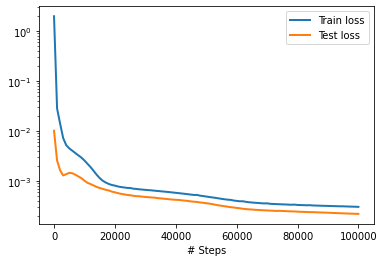

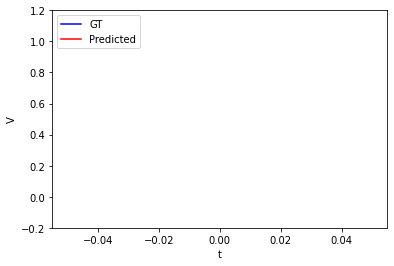

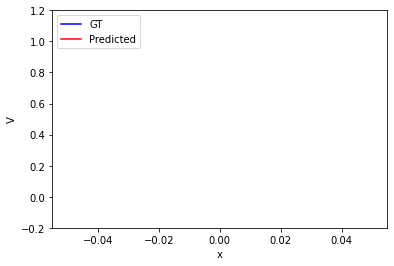

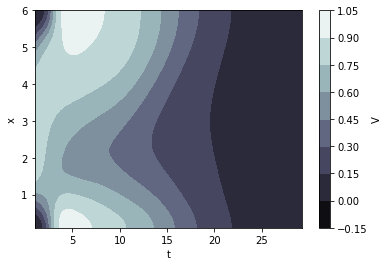

In [ ]:
import sys
import os
#dir_path = os.path.dirname(os.path.realpath(__file__))
#sys.path.append(dir_path)
dir_path = '/content'
sys.path.append(dir_path)
from sklearn.model_selection import train_test_split
from deepxde.backend import tf
import matplotlib.pyplot as plt
import argparse
import numpy as np
import deepxde as dde # version 0.11 or higher
from generate_plots_1d import plot_1D  # should be changed for the new one
from generate_plots_2d import plot_2D
#from generate_plots_1d_MV import plot_1D
import utils

#if __name__ == "__main__":
    #parser = argparse.ArgumentParser()
    #parser.add_argument('-f', '--file-name', dest='file_name', required = True, type = str, help='File name for input data')
    #parser.add_argument('-m', '--model-folder-name', dest='model_folder_name', required = False, type = str, help='Folder name to save model (prefix /)')
    #parser.add_argument('-d', '--dimension', dest='dim', required = True, type = int, help='Model dimension. Needs to match the input data')
    #parser.add_argument('-n', '--noise', dest='noise', action='store_true', help='Add noise to the data')
    #parser.add_argument('-w', '--w-input', dest='w_input', action='store_true', help='Add W to the model input data')
    #parser.add_argument('-v', '--inverse', dest='inverse', required = False, type = str, help='Solve the inverse problem, specify variables to predict (e.g. a / ad / abd')
    #parser.add_argument('-ht', '--heter', dest='heter', required = False, action='store_true', help='Predict heterogeneity - only in 2D')
    #parser.add_argument('-p', '--plot', dest='plot', required = False, action='store_true', help='Create and save plots')
    #parser.add_argument('-a', '--animation', dest='animation', required = False, action='store_true', help='Create and save 2D Animation')
    #args = parser.parse_args()


## Network Parameters
# 1D
input_1d = 2 # network input size (1D) # dimension of the X
num_hidden_layers_1d = 4 # number of hidden layers for NN (1D)
hidden_layer_size_1d = 32 # size of each hidden layers (1D)
output_1d = 3 # network output size (1D)
# 2D
input_2d = 3 # network input size (2D)
num_hidden_layers_2d = 4 # number of hidden layers for NN (2D)
hidden_layer_size_2d = 32 # size of each hidden layers (2D)
output_2d = 3 # network output size (2D)
output_heter = 3 # network output size for heterogeneity case (2D)
## Training Parameters
num_domain = 20000 # number of training points within the domain
num_boundary = 1000 # number of training boundary condition points on the geometry boundary
num_test = 1000 # number of testing points within the domain
MAX_MODEL_INIT = 16 # maximum number of times allowed to initialize the model
MAX_LOSS = 4 # upper limit to the initialized loss
epochs = 100000 #60000 # number of epochs for training
lr =  0.00005 # learning rate
noise = 0.1 # noise factor
test_size = 0.1 # precentage of testing data 

def main():

    dim = 1
    noise_introduced = False
    inverse_activated = True
    inverse_string = 'tausi'
    inverse = ['tausi']  #[inverse_string]
    model_folder_name = "/content"
    animation = False
    heter = False
    w_used = False #data

    ## Get Dynamics Class
    dynamics = utils.system_dynamics()

    ## Parameters to inverse (if needed)
    params = dynamics.params_to_inverse(inverse)

    ## Generate Data
    file_name = "data_nifedipine_base"
    observe_x, u, w = dynamics.generate_data(file_name, dim)

    ## Split data to train and test
    observe_train, observe_test, u_train, u_test = train_test_split(observe_x, u, test_size=test_size)
    ## Split with W
    if w_used:
      observe_train, observe_test, u_train, u_test, w_train, w_test = train_test_split(observe_x, u, w, test_size=test_size)

    ## Add noise to training data if needed
    if noise_introduced:
        u_train = u_train + noise*np.random.randn(u_train.shape[0], u_train.shape[1])

    ## Geometry and Time domains
    geomtime = dynamics.geometry_time(dim)
    ## Define Boundary Conditions
    bc = dynamics.BC_func(dim, geomtime)
    ## Define Initial Conditions
    ic = dynamics.IC_func(observe_train, u_train)

    ## Model observed data
    observe_u = dde.PointSetBC(observe_train, u_train, component=0)  # component says which component it is
    input_data = [bc, ic, observe_u]
    if w_used: ## If W required as an input
        observe_w = dde.PointSetBC(observe_train, w_train, component=1)  # probably will have to change component to =2s
        input_data = [bc, ic, observe_u, observe_w]

    ## Select relevant PDE (Dim, Heterogeneity) and define the Network
    if dim == 1:
        pde = dynamics.pde_1D
        net = dde.maps.FNN([input_1d] + [hidden_layer_size_1d] * num_hidden_layers_1d + [output_1d], "tanh", "Glorot uniform")
    elif dim == 2 and heter:
        pde = dynamics.pde_2D_heter
        net = dde.maps.FNN([input_2d] + [hidden_layer_size_2d] * num_hidden_layers_2d + [output_heter], "tanh", "Glorot uniform")
        net.apply_output_transform(dynamics.modify_output_heter)
    elif dim == 2 and not heter:
        pde = dynamics.pde_2D
        net = dde.maps.FNN([input_2d] + [hidden_layer_size_2d] * num_hidden_layers_2d + [output_2d], "tanh", "Glorot uniform")
    pde_data = dde.data.TimePDE(geomtime, pde, input_data,
                            num_domain = num_domain,
                            num_boundary=num_boundary,
                            anchors=observe_train,
                            num_test=num_test)
    model = dde.Model(pde_data, net)
    #loss_weights = [1]*(len(input_data)+2)  # original
    #loss_weights = [1]*(len(input_data)+3)   # mine (new)
    #loss_weights[0:2] = (1.5,1.5)
    #model.compile("adam", lr=lr, loss_weights=loss_weights)
    print("flag 1")
    model.compile("adam", lr=lr)
    print("flag 2")

    ## Stabalize initialization process by capping the losses
    losshistory, _ = model.train(epochs=1)
    num_itertions = len(losshistory.loss_train)
    initial_loss = max(losshistory.loss_train[num_itertions - 1])
    num_init = 0
    while initial_loss>MAX_LOSS or np.isnan(initial_loss).any() or np.isinf(initial_loss).any():  # added checking for inf values
        num_init += 1
        model = dde.Model(pde_data, net)
        model.compile("adam", lr=lr)
        #model.compile("adam", lr=lr, loss_weights=loss_weights)
        losshistory, _ = model.train(epochs=1)
        initial_loss = max(losshistory.loss_train[0])
        if num_init > MAX_MODEL_INIT:
            raise ValueError('Model initialization phase exceeded the allowed limit')

    print("flag 3")


    #D = tf.math.exp(tf.Variable(-1.897119985))  #initialised to 0.15
    #D = tf.math.exp(dde.Variable(-0.6931471806))  #initialised to 0.5
    #D = dde.Variable(0.5)
    ## Train Network
    out_path = dir_path
    print("out_path: " + out_path)
    print(params)
    if inverse_activated:
        #model.compile("adam", lr=lr, metrics=["l2 relative error"], external_trainable_variables=params[0]) #added
        print("flag 3.1")
        variables_file = "variables_" + inverse_string + ".dat"
        print("flag 3.2")
        variable = dde.callbacks.VariableValue(params, period=1000, filename=variables_file)
        print("flag 3.3")
        losshistory, train_state = model.train(epochs=epochs, model_save_path = out_path, callbacks=[variable])
        print("flag 3.4")
    else:
        print("flag 3.5")
        losshistory, train_state = model.train(epochs=epochs, model_save_path = out_path, display_every=1000)  # crashes here
        print("flag 3.6")

    # Plot loss history
    loss_train = np.sum(losshistory.loss_train, axis=1)
    loss_test = np.sum(losshistory.loss_test, axis=1)

    plt.figure()
    plt.semilogy(losshistory.steps, loss_train, label="Train loss", linewidth=2)
    plt.semilogy(losshistory.steps, loss_test, label="Test loss", linewidth=2)
    for i in range(len(losshistory.metrics_test[0])):
        plt.semilogy(
            losshistory.steps,
            np.array(losshistory.metrics_test)[:, i],
            label="Test metric",
        )
    plt.xlabel("# Steps")
    plt.legend()

    print("flag 4")

    ## Compute rMSE
    u_pred = model.predict(observe_test)[:,0:1]  # add predict V and W and then plot them (in forward mode)
    rmse_u = np.sqrt(np.square(u_pred - u_test).mean())
    print('--------------------------')
    print("V rMSE for test data:", rmse_u)
    print('--------------------------')
    print("Arguments: ")
    #print("Arguments: ", args)

    print("flag 5")

    # Plot
    data_list = [observe_x, observe_train, u_train, u]
    if True and dim == 1:
        plot_1D(data_list,dynamics, model, model_folder_name)
    elif True and dim == 2:
        plot_2D(data_list,dynamics, model, animation, model_folder_name)
    return data_list,dynamics, model, model_folder_name

## Run main code
data_list_base,dynamics_base, model_base, model_folder_name_base = main()

Predicting...
'predict' took 0.011139 s

Predicting...
'predict' took 0.002956 s



/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:53: MatplotlibDeprecationWarning: Unrecognized location 'top right'. Falling back on 'best'; valid locations are
	best
	upper right
	upper left
	lower left
	lower right
	right
	center left
	center right
	lower center
	upper center
	center
This will raise an exception in 3.3.


<Figure size 432x288 with 0 Axes>

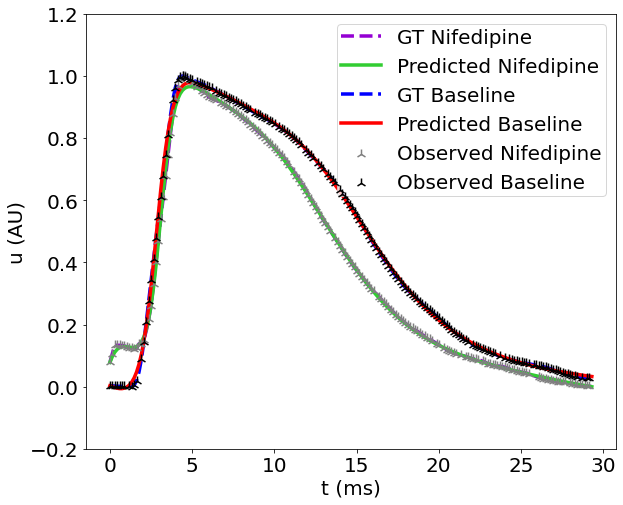

In [ ]:
import io
import numpy as np
from PIL import Image

## Unpack data
observe_x_exp, observe_train_exp, v_train_exp, v_exp = data_list_exp[0], data_list_exp[1], data_list_exp[2], data_list_exp[3]
observe_x_base, observe_train_base, v_train_base, v_base = data_list_base[0], data_list_base[1], data_list_base[2], data_list_base[3]

## Pick a cell to show
#cell = dynamics.max_x*0.75
cell = 6
lnw = 3.5 # line width
szm = 100 # marker size
ftsz = 20 # font size

## Get data for cell exp
idx_exp = [i for i,ix in enumerate(observe_x_exp) if observe_x_exp[i][0]==cell]
observe_geomtime_exp = observe_x_exp[idx_exp]
v_GT_exp = v_exp[idx_exp]
v_predict_exp = model_exp.predict(observe_geomtime_exp)[:,0:1]
t_axis_exp = observe_geomtime_exp[:,1]
## Get data for points used in training process exp
idx_train_exp = [i for i,ix in enumerate(observe_train_exp) if observe_train_exp[i][0]==cell]
v_trained_points_exp = v_train_exp[idx_train_exp]
t_markers_exp = (observe_train_exp[idx_train_exp])[:,1]

## Get data for cell base
idx_base = [i for i,ix in enumerate(observe_x_base) if observe_x_base[i][0]==cell]
observe_geomtime_base = observe_x_base[idx_base]
v_GT_base = v_base[idx_base]
v_predict_base = model_base.predict(observe_geomtime_base)[:,0:1]
t_axis_base = observe_geomtime_base[:,1]
## Get data for points used in training process exp
idx_train_base = [i for i,ix in enumerate(observe_train_base) if observe_train_base[i][0]==cell]
v_trained_points_base = v_train_base[idx_train_base]
t_markers_base = (observe_train_base[idx_train_base])[:,1]

## create figure
plt.figure()
plt.rc('font', size= ftsz) #controls default text
fig, ax = plt.subplots()
fig.set_size_inches(9.5, 8)
GT_exp, = ax.plot(t_axis_exp, v_GT_exp, c='darkviolet', label='GT Nifedipine',linewidth=lnw, linestyle = 'dashed', zorder=0)
Predicted_exp, = ax.plot(t_axis_exp, v_predict_exp, c='limegreen', label='Predicted Nifedipine',linewidth=lnw, zorder=5)
GT_base, = ax.plot(t_axis_base, v_GT_base, c='b', label='GT Baseline',linewidth=lnw, linestyle = 'dashed', zorder=0)
Predicted_base, = ax.plot(t_axis_base, v_predict_base, c='r', label='Predicted Baseline',linewidth=lnw, zorder=5)

if len(t_markers_exp):
    Observed_exp = ax.scatter(t_markers_exp, v_trained_points_exp, marker='2', c='gray',s=szm, label='Observed Nifedipine', zorder=10)
if len(t_markers_base):
    Observed_base = ax.scatter(t_markers_base, v_trained_points_base, marker='2', c='black',s=szm, label='Observed Baseline', zorder=10)

plt.legend(loc='top right', borderpad=0.2)
plt.xlabel('t (ms)', fontsize = ftsz)
plt.ylabel('u (AU)', fontsize = ftsz)
plt.ylim((-0.2,1.2))

## save figure
# png1 = io.BytesIO()
plt.savefig("content" + "_cell_plot_1D.png", format="png", dpi=500, pad_inches = .1, bbox_inches = 'tight')
# plt.savefig(png1, format="eps", dpi=500, pad_inches = .1, bbox_inches = 'tight')
plt.savefig("content" + "_cell_plot_1D.svg", format="svg", dpi=500, pad_inches = .1, bbox_inches = 'tight')


In [ ]:
#observe_x_exp, observe_train_exp, v_train_exp, v_exp, t_axis_exp, v_GT_exp, v_predict_exp
#observe_x_base, observe_train_base, v_train_base, v_base, t_axis_base, v_GT_base, v_predict_base
import pickle
dict1 = {'observe_x_exp' : observe_x_exp, 'observe_train_exp' : observe_train_exp, 'v_train_exp' : v_train_exp, 'v_exp' : v_exp, 't_axis_exp' : t_axis_exp, 'v_GT_exp' : v_GT_exp, 'v_predict_exp' : v_predict_exp}
file1 = open("exp_variables.txt", "wb") 
pickle.dump(dict1, file1)
file1.close

with open('exp_variables.txt', 'rb') as f:
    dict = pickle.load(f)

In [ ]:
#observe_x_exp, observe_train_exp, v_train_exp, v_exp, t_axis_exp, v_GT_exp, v_predict_exp
#observe_x_base, observe_train_base, v_train_base, v_base, t_axis_base, v_GT_base, v_predict_base
import pickle
dict2 = {'observe_x_base' : observe_x_base, 'observe_train_base' : observe_train_base, 'v_train_base' : v_train_base, 'v_base' : v_base, 't_axis_base' : t_axis_base, 'v_GT_base' : v_GT_base, 'v_predict_base' : v_predict_base}
file2 = open("base_variables.txt", "wb") 
pickle.dump(dict2, file2)
file1.close

with open('base_variables.txt', 'rb') as f:
    dict = pickle.load(f)

In [ ]:
#!cat /proc/meminfo
#!cat /proc/cpuinfo
!df -h

Filesystem      Size  Used Avail Use% Mounted on
overlay         167G   39G  128G  24% /
tmpfs            64M     0   64M   0% /dev
shm             5.7G     0  5.7G   0% /dev/shm
/dev/root       2.0G  1.2G  812M  59% /sbin/docker-init
tmpfs           6.4G   36K  6.4G   1% /var/colab
/dev/sda1       174G   42G  132G  25% /opt/bin/.nvidia
tmpfs           6.4G     0  6.4G   0% /proc/acpi
tmpfs           6.4G     0  6.4G   0% /proc/scsi
tmpfs           6.4G     0  6.4G   0% /sys/firmware
